#About the Dataset
**Source:** https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/data
<br>
**License:** <a href='https://creativecommons.org/licenses/by-nc-sa/4.0/'>CC BY-NC-SA 4.0</a>

As stated in Kaggle, the dataset includes data about 1K+ Amazon Product Ratings and Reviews as per their details listed on the official website of Amazon. The data was gathered in January 2023 by J. Karkavelraja.

####**Features**

*   **product_id** - Product ID
*   **product_name** - Name of the Product
*   **category** - Category of the Product
*   **discounted_price** - Discounted Price of the Product *(in INR)*
*   **actual_price** - Actual Price of the Product *(in INR)*
*   **discount_percentage** - Percentage of Discount for the Product
*   **rating** - Rating of the Product
*   **rating_count** - Number of people who voted for the Amazon rating
*   **about_product** - Description about the Product
*   **user_id** - ID of the user who wrote review for the Product
*   **user_name** - Name of the user who wrote review for the Product
*   **review_id** - ID of the user review
*   **review_title** - Short review
*   **review_content** - Long review
*   **img_link** - Image Link of the Product
*   **product_link** - Official Website Link of the Product

The key columns that will be used in this analysis are *discount_percentage, rating, rating_count, and category*. The *rating_count* column will represent sales.

#Objectives

1. **Determine Discount Patterns Across Categories:** Calculate and compare the average discount percentage for each product category.
2. **Analyze the Impact of Discounts on Sales Volume:** Assess the correlation between discount percentage and rating count, and identify any discount thresholds that lead to a significant increase in rating counts.
3. **Evaluate Discount Effectiveness on Product Ratings:** Analyze the average product rating across different discount ranges (e.g., 0-10%, 10-20%, etc.) and determine if there is an optimal discount range that results in the highest average ratings.
4. **Identify Successful Discount Strategies of Top-Rated Products:** Examine the discount percentages of products with ratings of 4.50 and above over the past year, and compare these strategies with those of products with ratings below 4.00.

#Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Format float numbers to be up to 2 decimals only
pd.options.display.float_format='{:,.2f}'.format

In [ ]:
df = pd.read_csv('amazon.csv')

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.tail()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","₹3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...","very good,Work but front melt after 2 month,Go...","plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399","₹1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...","Fan Speed is slow,Good quality,Good product,go...",I have installed this in my kitchen working fi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Havells-Ventilair-230mm-...
1464,B01486F4G6,Borosil Jumbo 1000-Watt Grill Sandwich Maker (...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,863","₹3,690",22%,4.3,"6,987","Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...","AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...","Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...","R20RBRZ0WEUJT9,ROKIFK9R2ISSE,R30EEG2FNJSN5I,R2...","Works perfect,Ok good product,Nice Product. Re...",It does it job perfectly..only issue is temp c...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...


In [ ]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'Are there duplicated values? {df.duplicated().values.any()}')

The dataset has 1465 rows and 16 columns.
Are there duplicated values? False


In [ ]:
# Upon trying to convert 'rating' into numeric,
# it was shown that a column contains a special character instead of numbers
display(df[df['rating'] == '|'])

# Convert '|' into null
df['rating'] = df['rating'].replace('|', np.NaN)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
print(f'Are there null values? {df.isna().values.any()}')
df.info()

Are there null values? True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1464 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 n

In [ ]:
null_rows = df.isna().any(axis=1)
df[null_rows]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...","₹2,099","₹2,499",16%,NaN,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


One of the key columns is *rating_count*, which will represent sales. Therefore, the rows above will be dropped.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['discounted_price'] = df['discounted_price'].str.replace(',', '')
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.strip()

df['actual_price'] = df['actual_price'].str.replace(',', '')
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.strip()

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').str.strip()
df['rating_count'] = df['rating_count'].str.replace(',', '').str.strip()

# Convert the columns above into numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'])
df['actual_price'] = pd.to_numeric(df['actual_price'])
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'])
df['rating_count'] = pd.to_numeric(df['rating_count'])
df['rating'] = pd.to_numeric(df['rating'])

df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count',
    'rating']].info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   discounted_price     1462 non-null   float64
 1   actual_price         1462 non-null   float64
 2   discount_percentage  1462 non-null   int64  
 3   rating_count         1462 non-null   int64  
 4   rating               1462 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 68.5 KB


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,"1,099.00",64,4.20,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


# Data Transformation

In [ ]:
# Insert a new column named 'discount_range' to put the discount_percentage into bins
df.insert(6, 'discount_range',
          pd.cut(df['discount_percentage'], bins=[-np.inf, 10, 20, 30, 40, 50,
                                                  60, 70, 80, 90, 100],
                labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%',
                        '60-70%', '70-80%', '80-90%', '90-100%']))

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,discount_range,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,"1,099.00",64,60-70%,4.20,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.00,43,40-50%,4.00,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,"1,899.00",90,80-90%,3.90,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.00,53,50-60%,4.20,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.00,61,60-70%,4.20,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Split the rating into categories:
# High - 4.50 and above
# Medium - 4.00 to 4.50
# Low - below 4.00
df.insert(8, 'rating_category', pd.cut(df['rating'], bins=[0, 3.99, 4.49, 5.00],
                                       labels=['Low', 'Medium', 'High']))

In [ ]:
# To check if the rating_category is accurate
df.sample(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,discount_range,rating,rating_category,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1106,B00A7PLVU6,Orpat HHB-100E WOB 250-Watt Hand Blender (White),Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,753.00,899.00,16,10-20%,4.20,Medium,18462,This product does not require installation. pl...,"AG43Z7WV62ULSGSI3JHOKCZZRSLQ,AFXOKBDDHJNQRGHFW...","Monika kochhar,Mr.,Amazon Customer,Amazon Cust...","RZU7M4VT3VR9I,R34QGD0WN73BME,R3GPSO444Z45JY,R8...","Nice product but little bit costly,Is good,Val...","Speed is gud nd easy to handle,Very useful,Qua...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Orpat-HHB-100E-WOB-250-W...
879,B09YLFHFDW,Sony WI-C100 Wireless Headphones with Customiz...,"Electronics|Headphones,Earbuds&Accessories|Hea...","1,599.00","2,790.00",43,40-50%,3.60,Low,2272,"Equalizer Support : Your sound, just how you l...","AGPAF3K6YHEM7446WLCBQJZWORAQ,AECOALJSL7PRTK6PA...","Nikhil M.,Manoj K.,Nikhil,Lenkalapally raju,Yo...","R3F2RGMVGXBBAW,R1QF8TBA1FDIL8,R3PQ1KGTPP89XV,R...","A well designed product,Rich Quality Music But...",Let me start with something no one writes abou...,https://m.media-amazon.com/images/I/31lF-FdlrH...,https://www.amazon.in/Sony-Headphones-Customiz...
845,B083RD1J99,HP Wired Mouse 100 with 1600 DPI Optical Senso...,Computers&Accessories|Accessories&Peripherals|...,328.00,399.00,18,10-20%,4.10,Medium,3441,"Work on your terms with an ambidextrous, conto...","AFTUS3YZBNWUVW7FV7AQ4O532UNQ,AGREMFD5IKQE5NK2Y...","Rakesh Roshan Koul,Vikas Kushwaha,GR Talwar,Su...","R28LVJV0VALRCQ,RUMWHXUP5WKO2,R3D5OM30BEDYE0,R2...","Good Quality Mouse,good,Good product for its p...",The product is working smoothly with soft slig...,https://m.media-amazon.com/images/I/214VmJYxx9...,https://www.amazon.in/HP-Wired-Mouse-100-6VY96...
666,B07PLHTTB4,Zodo 8. 5 inch LCD E-Writer Electronic Writing...,Computers&Accessories|Accessories&Peripherals|...,100.00,499.00,80,70-80%,3.50,Low,9638,Size: 8. 5 inch|Good grade,"AES4PVTQ4WEANJ2E2HOJNVVBGQNQ,AGU4YJLPDKSSANW5P...","vasanth,Hemant Ghengat,Gopal,ANUKUMAR S L,Mano...","R2MSV2JRVJGRQN,R2N6TQ3N4XSSFR,R3Q36Y6U3YKG6B,R...","Good,Kids love this,Simply superb,Happy,Good,N...","Goid,Best Education Gadget For Kids,Brightness...",https://m.media-amazon.com/images/I/51JF5xTgNh...,https://www.amazon.in/ZODO-Writer-Electronic-W...
446,B08VB2CMR3,"OPPO A74 5G (Fluid Black, 6GB RAM, 128GB Stora...",Electronics|Mobiles&Accessories|Smartphones&Ba...,"15,490.00","20,990.00",26,20-30%,4.20,Medium,32916,"6.49"" Inch (16.5cm) FHD+ Punch-hole Display wi...","AEW3QDKETJO6JJTGK5JI2ZW2PA3Q,AFKWBZELRCG57S5TP...","Chandra.g,Shan Mohd,Suvajit Thakura,Radhe,Jyot...","R2P0CRDHOMUX,R1JGV8KAD50B2H,R3TYY9FVH4FCHC,R1Q...","Good,Amazing phone,Nice mobile ... But Amazon ...","I like it,Great phone in smaller amount these ...",https://m.media-amazon.com/images/I/41iHN9Y07c...,https://www.amazon.in/OPPO-Fluid-Black-128GB-S...


In [ ]:
# Split the categories
df['category'] = df['category'].str.split('|')
df_category = df.explode('category').reset_index(drop=True)

print(f'df_category has {df_category.shape[0]} rows and {df_category.shape[1]} columns.')
df_category.head()

df_category has 6291 rows and 18 columns.


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,discount_range,rating,rating_category,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.00,"1,099.00",64,60-70%,4.20,Medium,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Accessories&Peripherals,399.00,"1,099.00",64,60-70%,4.20,Medium,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Cables&Accessories,399.00,"1,099.00",64,60-70%,4.20,Medium,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
3,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Cables,399.00,"1,099.00",64,60-70%,4.20,Medium,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
4,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,USBCables,399.00,"1,099.00",64,60-70%,4.20,Medium,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


# Descriptive Statistics

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,"1,462.00","1,462.00","1,462.00","1,462.00","1,462.00"
mean,"3,129.98","5,453.09",47.67,4.10,"18,307.38"
std,"6,950.55","10,884.47",21.61,0.29,"42,766.10"
min,39.00,39.00,0.00,2.00,2.00
25%,325.00,800.00,32.00,4.00,"1,191.50"
50%,799.00,"1,670.00",50.00,4.10,"5,179.00"
75%,"1,999.00","4,321.25",63.00,4.30,"17,342.25"
max,"77,990.00","139,900.00",94.00,5.00,"426,973.00"


In [ ]:
print(df['discount_range'].value_counts())

under_50 = df[df['discount_percentage'] <= 50].agg({'discount_range': 'count'})
print(f'The number of products with less than or equal to 50% discount is {under_50.values}.')

above_50 = df[df['discount_percentage'] > 50].agg({'discount_range': 'count'})
print(f'The number of products with more than 50% discount is {above_50.values}.')

discount_range
50-60%     256
40-50%     252
60-70%     220
30-40%     174
20-30%     164
70-80%     158
10-20%      95
0-10%       84
80-90%      53
90-100%      6
Name: count, dtype: int64
The number of products with less than or equal to 50% discount is [769].
The number of products with more than 50% discount is [693].


In [ ]:
df['rating_category'].value_counts()

rating_category
Medium    1006
Low        353
High       103
Name: count, dtype: int64

# Data Visualization

In [ ]:
discrete_colors = ['#541f3f', '#8e4158', '#a55361', '#ad5c64', '#b7696a',
                   '#c1766f', '#c57e73', '#c98878', '#d9ae92', '#e0c3a3']

In [ ]:
# Plot the average discount percentage per category
df_discount_per_category = df_category.groupby('category')
df_discount_per_category = df_discount_per_category.agg({'discount_percentage': 'mean'})
df_discount_per_category = df_discount_per_category.sort_values('discount_percentage', ascending=False)

fig = px.imshow(df_discount_per_category,
                title='Average Discount Percentage by Category',
                width=800,
                height=4800,
                aspect='auto',
                text_auto=True,
                color_continuous_scale='brwnyl')
fig.update_layout(title_font_size=18)
fig.show()

In [ ]:
print('The Top 10 Categories with the Highest Discounts')

i = 0
for category in df_discount_per_category[:10].index.tolist():
  i += 1
  print(f'{i}. {category}')

The Top 10 Categories with the Highest Discounts
1. CableConnectionProtectors
2. Earpads
3. PhoneCharms
4. DustCovers
5. Shower&WallMounts
6. InternalHardDrives
7. Adapters
8. USBtoUSBAdapters
9. Décor
10. Stands


In [ ]:
# Plot the average rating counts per discount percentage range
df_rating_count_per_discount = df.groupby('discount_range', as_index=False)
df_rating_count_per_discount = df_rating_count_per_discount.agg({'rating_count': 'mean'})

line = px.line(df_rating_count_per_discount,
               x='discount_range',
               y='rating_count',
               title='Average Rating Count by Discount Range',
               markers=True)
line.update_traces(line={'width': 3, 'color': '#a55361'},
                   marker=dict(size=10))
line.update_layout(yaxis_title='Average Rating Count',
                   xaxis_title='Discount Range',
                   title_font_size=18)
line.show()

The discount range with the highest sales (rating_count) is 60-70%, followed by 20-30%. It is also shown that the sales (rating_count) don't increase when the discount increases.

In [ ]:
# Plot the distribution of rating counts per discount percentage range
fig = px.box(df,
             x='discount_range',
             y='rating_count',
             title='Rating Count Distribution by Discount Range',
             height=600,
             color='discount_range',
             color_discrete_sequence=discrete_colors)
fig.update_xaxes(categoryorder='array',
                 categoryarray=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
                                '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])
fig.update_layout(yaxis_title='Rating Count',
                  xaxis_title='Discount Range',
                  title_font_size=18,
                  showlegend=False)
fig.show()

All the discount ranges are positively skewed aside from 90-100%. The six products with a 90-100% discount range have the same sales (rating_count) of about 13.937k except for the one outlier with 4,426 sales.

The average sales (rating_count) are lower than the upper fence. Aside from the two highest discount ranges, there are some outliers across all discount ranges. It means that there are a few products with considerably high sales (rating_count).

In [ ]:
# Plot the average rating per discount range
df_rating_per_discount = df.groupby('discount_range', as_index=False)
df_rating_per_discount = df_rating_per_discount.agg({'rating': 'mean'})

bar = px.bar(df_rating_per_discount,
             x='discount_range',
             y='rating',
             color='rating',
             color_continuous_scale='brwnyl',
             title='Average Product Rating by Discount Range')
bar.update_layout(xaxis_title='Discount Range',
                  yaxis_title='Average Rating',
                  title_font_size=18,
                  coloraxis_showscale=False)
bar.show()

There are no significant differences in the average product rating across all discount ranges. The average product rating is consistently around 4.00, regardless of the discount percentage.

In [ ]:
# Plot the distribution of discount percentages per rating categories
fig = px.box(df,
             x='rating_category',
             y='discount_percentage',
             color='rating_category',
             color_discrete_sequence=discrete_colors[:3],
             title='Discount Percentage Distribution by Rating Category')
fig.update_xaxes(categoryorder='array',
                 categoryarray=['Low', 'Medium', 'High'])
fig.update_layout(yaxis_title='Discount (%)',
                  xaxis_title='Rating Category',
                  title_font_size=18,
                  showlegend=False)
fig.show()

Even after classifying the product rating into low, medium, and high, the average discount percentage remains consistent. The low-rated products only have a 4% difference from the medium and high-rated products, which both have the same average discount percentage. There are products with no discounts across all the rating categories.

Despite having a higher discount, more products are still low-rated, and vice versa. However, this does not mean that there is a negative relationship between rating and discounts since most products are medium-rated with high discounts. Based on the graph, there is no apparent relationship between discounts and rating categories.

# Correlation Analysis

In [ ]:
# Convert columns from object to a category data type
df_category['category'] = df_category['category'].astype('category').cat.codes
df_category['rating_category'] = df_category['rating_category'].astype('category').cat.codes
df_category[['category', 'rating_category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6291 entries, 0 to 6290
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         6291 non-null   int16
 1   rating_category  6291 non-null   int8 
dtypes: int16(1), int8(1)
memory usage: 18.6 KB


In [ ]:
# Plot the correlation between category, discount, rating and sales (rating_count)
df_corr = df_category[['category', 'discount_percentage', 'rating_count', 'rating',
                       'rating_category']]

fig = px.imshow(df_corr.corr(),
                text_auto=True,
                title='Correlation Matrix',
                color_continuous_scale='brwnyl',
                width=800,
                height=600)
fig.update_layout(title_font_size=18,
                  coloraxis_showscale=False)
fig.show()

The correlation between all the key columns is very weak. Category has a negative relationship with all the other key columns. Discount percentage only has a positive relationship with sales (rating_count). Sales (rating_count) only has a negative relationship with category. The rating and rating category only has a positive relationship with sales (rating_count).

It should be noted that the relationship between rating category and rating cannot be considered since both columns are essentially the same.

<Figure size 1280x960 with 0 Axes>

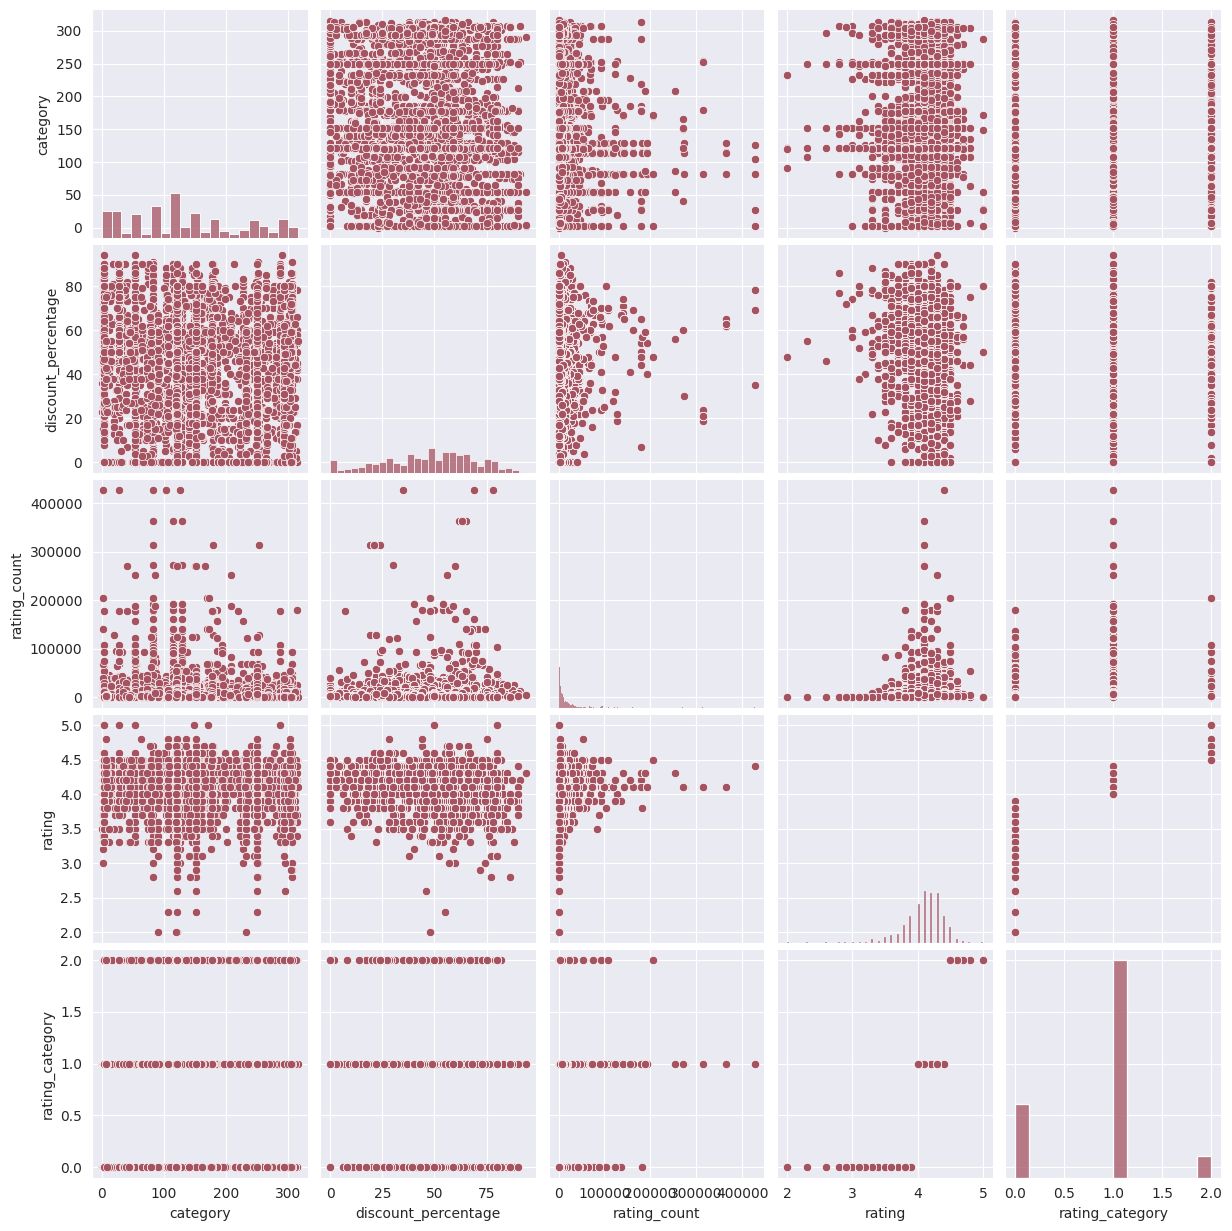

In [ ]:
plt.figure(dpi=200)
with sns.axes_style('darkgrid'):
  sns.pairplot(df_corr,
              plot_kws={'color': '#a55361'},
              diag_kws={'color': '#a55361'})
plt.show()

Based on this pairplot, some graphs have no clear patterns, while the others have plotted points that are only concentrated on a range of values.

Different product categories and discount percentages' plotted points are evenly spread out among the low, medium, and high-rated products. More sales (rating_count) have product ratings between 4.00 to 4.50. It is also shown in the concentration of plotted points under the rating graphs. Most of the plotted points are spread out between 3.50 to 4.50.

For the sales (rating_count), as previously shown on the boxplot graph, the average sales is under 50k with a lot of outliers. Aside from that, there are no other clear patterns.

The discount percentage and product category have almost the same patterns. The discount percentages' plotted points are evenly spread out across all categories. The plotted points for both the key columns are consistent with the findings that the product ratings are between 3.50 to 4.50 and the average sales (rating_count) is under 50k.

There seems to be no relationship between discount percentage, category, rating, and rating category.

# Regression Analysis

To further confirm if there is no significant relationship between discount percentage, category, rating, and rating category.

In [ ]:
df_regr = df_category[['category', 'discount_percentage', 'rating_count', 'rating']]

In [ ]:
target = np.log(df_regr['rating'])
features = df_regr.drop('rating', axis=1)

X_train, X_test, log_y_train, log_y_test = train_test_split(features,
                                                            target,
                                                            test_size=0.2,
                                                            random_state=10)

train_pct = 100 * len(X_train) / len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100 * X_test.shape[0] / features.shape[0]
print(f'Test data makes up the remaining {test_pct:.3}%')

log_regr = LinearRegression()
log_regr.fit(X_train, log_y_train)
rsquared = log_regr.score(X_train, log_y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%
Training data r-squared: 0.04


In [ ]:
target1 = np.log(df_regr['rating_count'])
features1 = df_regr.drop('rating_count', axis=1)

X_train1, X_test1, log_y_train1, log_y_test1 = train_test_split(features1,
                                                            target1,
                                                            test_size=0.2,
                                                            random_state=10)

train_pct = 100 * len(X_train1) / len(features1)
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100 * X_test1.shape[0] / features1.shape[0]
print(f'Test data makes up the remaining {test_pct:.3}%')

log_regr = LinearRegression()
log_regr.fit(X_train1, log_y_train1)
rsquared = log_regr.score(X_train1, log_y_train1)

print(f'Training data r-squared: {rsquared:.2}')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%
Training data r-squared: 0.059


Even by using logistic regression, the r-squared calculated is still too low to conclude any variability observed in both target variables (rating and sales (rating_count)) is explained by the regression model used.

It can be concluded that rating and sales (rating_count) are not affected by the discount percentage given to the products.

# Findings
* Categories with the highest discount percentage are cable connection protectors, earpads, phone charms, dust covers, shower and wall mounts, internal hard drives, adapters, USB-to-USB adapters, décor, and stands.
* The discount range with the highest sales (rating_count) is 60-70%.
* Most product ratings are between 3.50 to 4.50.
* The average sales (rating_count) is under 50k.
* Sales (rating_count) and product ratings do not increase when the discount increases.
* Product ratings are consistent across all categories and discount percentage ranges.
* Using correlation and logistic regression analysis, no relationship is found between discount percentage, rating, and sales (rating_count).

# Recommendation

Possible solutions to see if there are relationships between discount percentage, rating, and sales are adding more data and using another machine learning model.

There is no information regarding the date and time considered in the analysis. The discount analysis would bring more insights if other factors were considered, such as seasonal trends, monthly and yearly reviews, the date when the product was posted, and the date when the discount was implemented.

It is also better to use accurate sales data instead of using the rating count in analyzing the sales behavior toward different discount percentage ranges.
